In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-company-complaints/Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv


In [2]:
df = pd.read_csv('/kaggle/input/insurance-company-complaints/Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv')
df.head()

Company  File No.      Opened      Closed Coverage  \
0  Anthem Health Plans, Inc   7045593  05/31/2022  06/02/2022    Group   
1  Anthem Health Plans, Inc   7043381  02/28/2022  06/02/2022    Group   
2  Anthem Health Plans, Inc   7044860  05/03/2022  06/02/2022    A & H   
3  Anthem Health Plans, Inc   7043381  02/28/2022  06/02/2022    Group   
4  Anthem Health Plans, Inc   7052007  02/23/2023  03/17/2023    A & H   

   SubCoverage             Reason                SubReason  \
0  Health Only     Claim Handling      Medically Necessary   
1  Health Only     Claim Handling  Provider Contract Issue   
2  Health Only     Claim Handling                   Denial   
3        A & H     Claim Handling  Provider Contract Issue   
4        A & H  Marketing & Sales       Duplicate Coverage   

                         Disposition               Conclusion  Recovery  \
0     Company Position Substantiated  Company Position Upheld      0.00   
1                      Claim Settled                Satisfied   6467.30   
2                      Claim Settled               Claim Paid    147.58   
3                      Claim Settled                Satisfied   6467.30   
4  Compromised Settlement/Resolution           Premium Refund   2179.32   

   Status  
0  Closed  
1  Closed  
2  Closed  
3  Closed  
4  Closed

In [3]:
df.shape

(38267, 12)

In [4]:
df.describe()

File No.       Recovery
count  3.826700e+04   38267.000000
mean   7.032932e+06    1731.634862
std    1.890661e+04   15224.331603
min    7.000002e+06       0.000000
25%    7.013760e+06       0.000000
50%    7.042086e+06       0.000000
75%    7.049744e+06       0.000000
max    7.056168e+06  843825.850000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38267 entries, 0 to 38266
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      38267 non-null  object 
 1   File No.     38267 non-null  int64  
 2   Opened       38267 non-null  object 
 3   Closed       37304 non-null  object 
 4   Coverage     35827 non-null  object 
 5   SubCoverage  29307 non-null  object 
 6   Reason       35650 non-null  object 
 7   SubReason    35650 non-null  object 
 8   Disposition  22979 non-null  object 
 9   Conclusion   21173 non-null  object 
 10  Recovery     38267 non-null  float64
 11  Status       38267 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.5+ MB


In [6]:
df.isnull().sum()

Company            0
File No.           0
Opened             0
Closed           963
Coverage        2440
SubCoverage     8960
Reason          2617
SubReason       2617
Disposition    15288
Conclusion     17094
Recovery           0
Status             0
dtype: int64

In [7]:
df.nunique()

Company          765
File No.       20537
Opened          1603
Closed          1377
Coverage          53
SubCoverage      102
Reason             4
SubReason        179
Disposition       13
Conclusion        52
Recovery        2748
Status            21
dtype: int64

In [8]:
df['Reason'].unique()

array(['Claim Handling', 'Marketing & Sales', 'PolicyHolder Service', nan,
       'Underwriting'], dtype=object)

In [9]:
df['Status'].unique()

array(['Closed', 'New Doc', 'Open', 'Other – See Notes',
       'Sent to Company', 'Full Review - Standard', 'Recovery Pending',
       'Awaiting Decision', 'Reopened', 'Interim Letter Sent',
       'Supervisor Review', 'Extension Granted', 'Incomplete Follow-up',
       'Preliminary Review - Standard', 'No Response Follow-up',
       'In Progress', 'Awaiting Complainant Reponse', 'Verify Situs',
       'Sent to Agent', 'Missing Items', 'Missing Information'],
      dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Get list of categorical variables
s = (df.dtypes == "object")
categoricalCols = list(s[s].index)
for i in categoricalCols:
    df[i] = label_encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38267 entries, 0 to 38266
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      38267 non-null  int64  
 1   File No.     38267 non-null  int64  
 2   Opened       38267 non-null  int64  
 3   Closed       38267 non-null  int64  
 4   Coverage     38267 non-null  int64  
 5   SubCoverage  38267 non-null  int64  
 6   Reason       38267 non-null  int64  
 7   SubReason    38267 non-null  int64  
 8   Disposition  38267 non-null  int64  
 9   Conclusion   38267 non-null  int64  
 10  Recovery     38267 non-null  float64
 11  Status       38267 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 3.5 MB


In [15]:
df['Status'].unique()

array([ 2, 10, 12, 13, 18,  4, 15,  1, 16,  7, 19,  3,  6, 14, 11,  5,  0,
       20, 17,  9,  8])

In [29]:
#Identifying feature columns
features = df.drop(['File No.', 'Recovery', 'Opened', 'Closed'], axis=1)

#Identifying the target column
target = df['Recovery']

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [30]:
#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 
outliers = features.describe().T
outliers

count          mean       std       min       25%       50%  \
Company      38267.0  7.724300e-17  1.000013 -1.393254 -1.005388 -0.306376   
Coverage     38267.0 -8.318477e-17  1.000013 -1.813082 -0.203881  0.234992   
SubCoverage  38267.0 -3.565061e-17  1.000013 -1.503067 -0.425147 -0.250349   
Reason       38267.0 -4.753415e-17  1.000013 -0.605679 -0.605679 -0.605679   
SubReason    38267.0  7.130123e-17  1.000013 -1.305156 -0.951480 -0.340585   
Disposition  38267.0  1.128936e-16  1.000013 -1.518167 -0.909267 -0.097402   
Conclusion   38267.0  1.455733e-16  1.000013 -1.761789 -1.249078  0.545407   
Status       38267.0  8.318477e-17  1.000013 -1.126148 -0.158986 -0.158986   

                  75%       max  
Company      1.027714  1.863119  
Coverage     0.454428  2.063629  
SubCoverage  1.264565  1.468496  
Reason       0.900137  2.405953  
SubReason    0.832975  1.572479  
Disposition  1.120397  1.120397  
Conclusion   0.904304  0.904304  
Status      -0.158986  8.545469

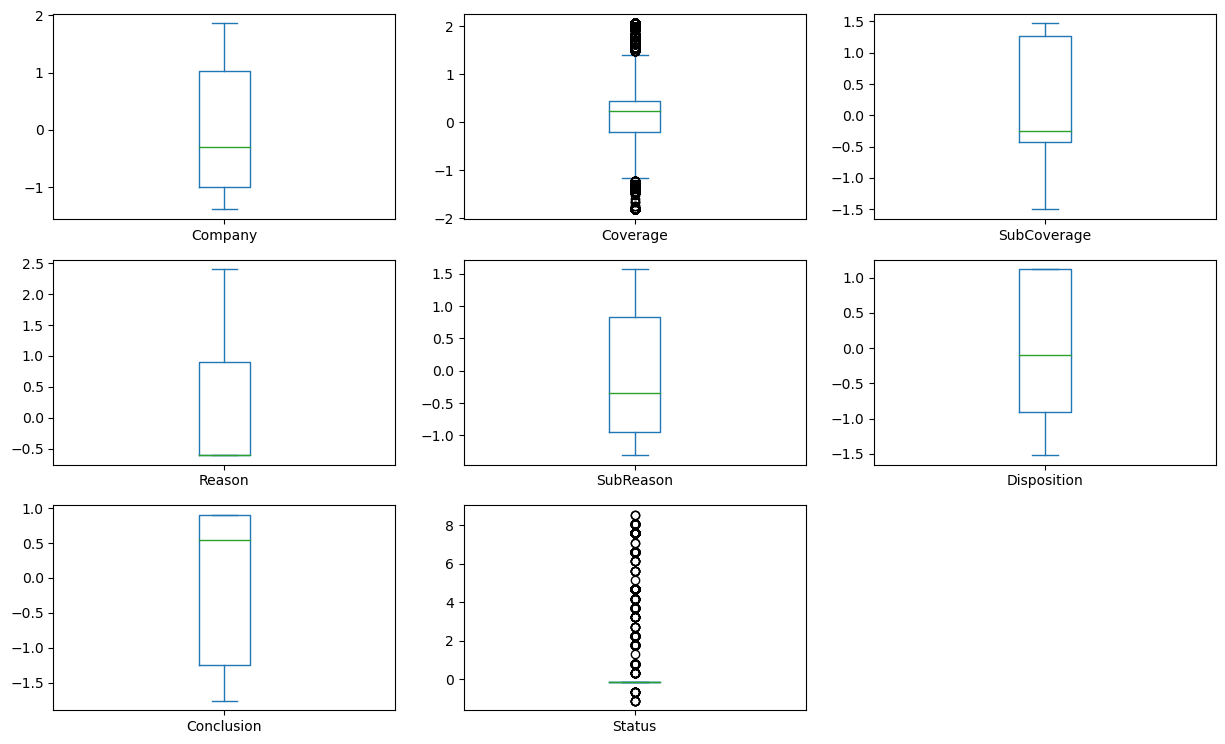

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

features.plot(kind="box",subplots=True,layout=(8, 3), figsize=(15,25));
plt.show()

In [32]:
def outlier_treatment(outliersDF, col):
  Q1 = outliersDF.loc[col, '25%']
  Q3 = outliersDF.loc[col, '75%']
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

#t = (features.dtypes == "int64")
#neumericCols = list(t[t].index)
for column  in features.columns:
  lowerbound,upperbound = outlier_treatment(outliers, column)
  print(f"Highest allowed {column}:",lowerbound)
  print(f"Lowest allowed {column}:",upperbound)

Highest allowed Company: -4.055041390256091
Lowest allowed Company: 4.077367874174007
Highest allowed Coverage: -1.1913453417013877
Lowest allowed Coverage: 1.4418926161127645
Highest allowed SubCoverage: -2.959715451253879
Lowest allowed SubCoverage: 3.7991335545693143
Highest allowed Reason: -2.864403078576485
Lowest allowed Reason: 3.158860999886892
Highest allowed SubReason: -3.6281628798961725
Lowest allowed SubReason: 3.509658285008485
Highest allowed Disposition: -3.953763470521388
Lowest allowed Disposition: 4.164892658779516
Highest allowed Conclusion: -4.4791524137126295
Lowest allowed Conclusion: 4.13437837449509
Highest allowed Status: -0.15898636007249534
Lowest allowed Status: -0.15898636007249534


In [34]:
features = features[(features["Status"] > 0.15)]

In [35]:
features.shape

(1110, 8)

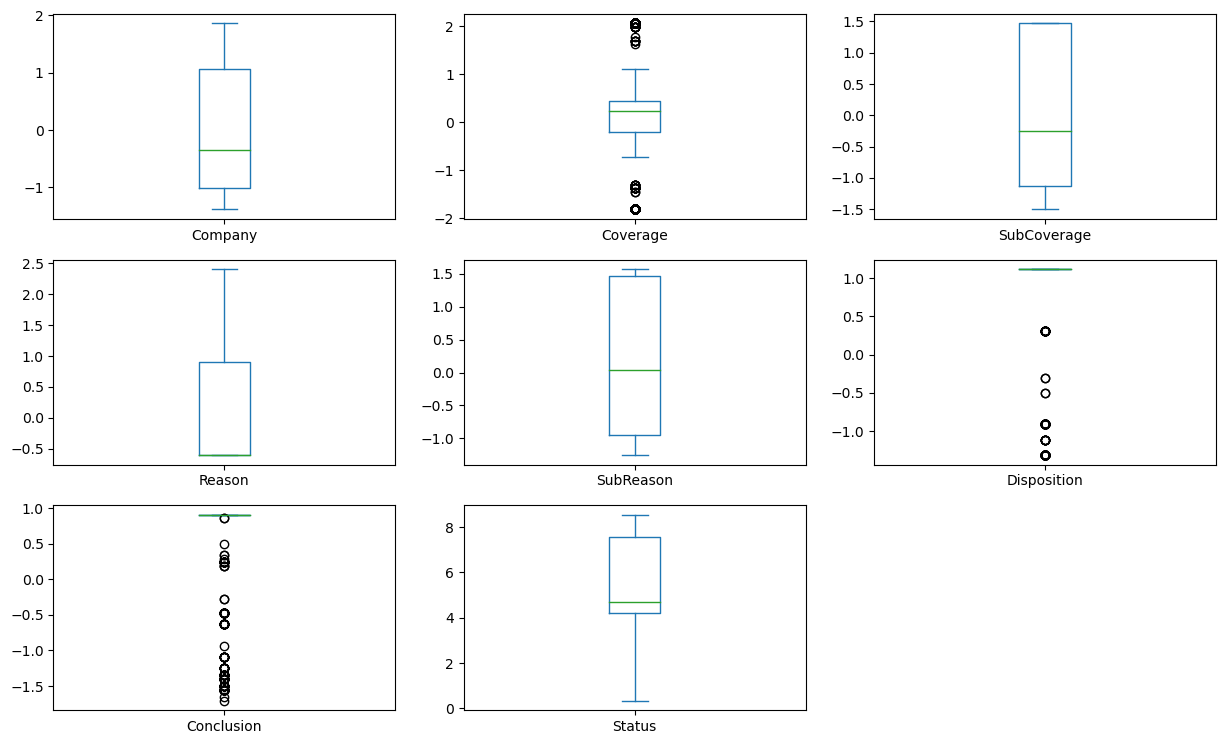

In [36]:
features.plot(kind="box",subplots=True,layout=(8, 3), figsize=(15,25));
plt.show()